In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

**Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Ans.

Matrix multiplication involves multiplying the elements of each row of the first matrix by the corresponding elements of each column in the second matrix and summing up these products.

If we have a matrix A with dimensions (n, k) and a matrix B with dimensions (k, m), the resulting matrix C will have dimensions (n, m).

For each element C[i][j] in the resulting matrix C, we have to perform
1. k multiplications:  one for each pair of elements in the corresponding row of A and column of B
2. k-1 additions: to sum up the products

Therefore, for a single element C[i][j], we perform k multiplications and k-1 additions.

To get the total number of multiplications and additions, we multiply these values by the number of elements in the resulting matrix C i.e. (n * m).

Thus, the total number of multiplications is n * m * k, and the total number of additions is n * m * (k - 1).


**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

METHOD-1 Using Lists:

In [5]:
def matrix_multiplication(A, B):
  n = len(A)
  k1 = len(A[0])
  k2 = len(B)
  m = len(B[0])

  if k1 != k2:
    print("Matrix dimensions are not compatible for multiplication.")
    return None

  C = [[0 for i in range(m)] for j in range(n)]

  for i in range(n):
    for j in range(m):
      for k in range(k1):
        C[i][j] += (A[i][k] * B[k][j])

  return C

A = [[1, 5, 4, 6],
     [1, 3, 7, 8],
     [2, 6, 9, 9]]

B = [[6, 0],
     [4, 1],
     [1, 5],
     [8, 3]]

C = matrix_multiplication(A, B)
print("Matrix multiplication using lists:")
print(C)


Matrix multiplication using lists:
[[78, 43], [89, 62], [117, 78]]


METHOD-2 Using numpy:

In [6]:
A = [[1, 5, 4, 6],
     [1, 3, 7, 8],
     [2, 6, 9, 9]]

B = [[6, 0],
     [4, 1],
     [1, 5],
     [8, 3]]

D = np.dot(A, B)
print("Matrix multiplication using numpy:")
print(D)

Matrix multiplication using numpy:
[[ 78  43]
 [ 89  62]
 [117  78]]


Time Comparison

In [7]:
N, K, M = 20, 120, 40
A = np.random.randint(10, size = (N, K))
B = np.random.randint(10, size = (K, M))

%time C = matrix_multiplication(A, B)
%time D = np.dot(A, B)

CPU times: user 43.5 ms, sys: 0 ns, total: 43.5 ms
Wall time: 43.7 ms
CPU times: user 0 ns, sys: 742 µs, total: 742 µs
Wall time: 655 µs


Many of the NumPy operations are optimized and implemented in C, which makes them significantly faster than Python lists. Thus, the NumPy implementation is faster for matrix multiplication, especially for larger matrices. The efficiency is due to the underlying C implementation of NumPy, which takes advantage of low-level optimizations and parallelization.

**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

METHOD - 1

Performing an element check would entail an $O(N)$ operation in each pass. Since the median is the almost the $\frac{N}{2}^{th}$ largest element, hence $\frac{N}{2}$ $O(N)$ such linear time checks are required, resulting in an $O(N^2)$ algorithm.

This is reflected by a simple "Selection Sort" algorithm, wherein we find the largest element in each pass and send to its appropriate position in the sorted part of the array, and terminate when the index reaches the middle index.

In [37]:
def selection(A):
  N = len(A)
  for i in range(N - 1, N//2 - 2, -1):
      max_idx = i
      for j in range(i):
          if A[j] > A[max_idx]:
              max_idx = j

      A[max_idx], A[i] = A[i], A[max_idx]

  if N % 2 == 1:
    print(A[N//2])
  else:
    print((A[N//2] + A[N//2 - 1])/2)

METHOD - 2

Sort the array, entailing an $O(NlogN)$ algorithm, and then directly fetch the middle indexed element

In [38]:
def sort(A):
  N = len(A)
  A_sort = sorted(A)
  if (N % 2 == 1):
    print(A_sort[N//2])
  else:
    print((A_sort[N//2] + A_sort[N//2 - 1])/2)

Time Comparison

In [50]:
N = 100
A = np.random.randint(10 * N, size = N)
print("Array: \n", A)

print("Median by method-1: ")
selection(A.copy())
print("Median by method-2: ")
sort(A.copy())
print("Median using numpy: ")
print(np.median(A.copy()))


Array: 
 [  3 846 645 117 880 605 503 997 946 573 440 193 846 714 391  25 434 172
 299 644 325 409 117 835 786 723 224 531 112 139 558   0  89 653 319 549
 804 893 138 510 867 844 258 672 901 689   9 260 918 649 171 897  12 167
 641 595 320 318 612 328 784 776 970 910 919 549 418 605  94 816 580 317
 955 235 945 333 884 375 458 136 929 587 994 546 512 295 319 917 571 831
 348 839 778 872 228 269 827 797 290 724]
Median by method-1: 
564.5
Median by method-2: 
564.5
Median using numpy: 
564.5


In [51]:
%time np.median(A.copy())

CPU times: user 1.04 ms, sys: 0 ns, total: 1.04 ms
Wall time: 1.05 ms


564.5

In [52]:
%time selection(A.copy())

564.5
CPU times: user 2.55 ms, sys: 60 µs, total: 2.61 ms
Wall time: 2.51 ms


In [53]:
%time sort(A.copy())

564.5
CPU times: user 318 µs, sys: 0 ns, total: 318 µs
Wall time: 258 µs


**Q4. What is the gradient of the following function with respect to x and y?**

$x^2y + y^3sin(x)$

Ans.

$F(x, y) = x^2y + y^3 \sin(x)$ <br><br>
$∇F = \begin{bmatrix}\frac{\partial F}{\partial x} \\ \frac{\partial F}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xy + y^3 \cos(x) \\ x^2 + 3y^2 \sin(x)  \end{bmatrix}$

**Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [29]:
import jax
import jax.numpy as jnp

def F(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def analytic_grad(x, y):
  return 2 * x * y + y**3 * jnp.cos(x), x**2 + 3 * y**2 * jnp.sin(x)

jax_grad = jax.grad(F, argnums = (0, 1))

sample_points = np.array([(1, -1), (-3, 0.5), (-2, 2)])

for X, Y in sample_points:
  print(f"Point: ({X}, {Y})")
  gx, gy = analytic_grad(X, Y)
  print(f"Analytically calculated Gradient: ({gx}, {gy})")
  print("Gradient calculated using jax", jax_grad(X, Y))
  print()

Point: (1.0, -1.0)
Analytically calculated Gradient: (-2.540302276611328, 3.5244128704071045)
Gradient calculated using jax (Array(-2.5403023, dtype=float32), Array(3.5244129, dtype=float32))

Point: (-3.0, 0.5)
Analytically calculated Gradient: (-3.123749017715454, 8.894160270690918)
Gradient calculated using jax (Array(-3.123749, dtype=float32), Array(8.89416, dtype=float32))

Point: (-2.0, 2.0)
Analytically calculated Gradient: (-11.329174995422363, -6.911568641662598)
Gradient calculated using jax (Array(-11.329175, dtype=float32), Array(-6.9115686, dtype=float32))



**Q6. Use sympy to confirm that you obtain the same gradient analytically.**

In [30]:
import sympy as smp
x, y = smp.symbols("x y")
F = x**2 * y + y**3 * smp.sin(x)

gradX, gradY = smp.diff(F, x), smp.diff(F, y)

display(gradX)
display(gradY)

2*x*y + y**3*cos(x)

x**2 + 3*y**2*sin(x)

**Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks in a certain manner (refer question).**

In [20]:
dict1 = {2022: {"Branch 1": {"1": {"Roll No.": 1, "Name": "N", "Marks": {"Maths": 100, "English": 70}}}, "Branch 2" : {}},
         2023: {"Branch 1": {}, "Branch 2" : {}},
         2024: {"Branch 1": {}, "Branch 2" : {}},
         2025: {"Branch 1": {}, "Branch 2" : {}}}

for year in dict1:
  print(f"{year}: ")
  for branch in dict1[year]:
    print(f"\t{branch}: ")
    for roll in dict1[year][branch]:
      print(f"\t\t{roll}: ")
      print("\t\t\t", end = "")
      for itms in dict1[year][branch][roll]:
        if itms == "Marks":
          print("Marks:")
          print("\t\t\t\t", end = "")
          for sub in dict1[year][branch][roll][itms]:
            print(f"{sub}: {dict1[year][branch][roll][itms][sub]}, ", end = "")
        else:
          print(f"{itms}: {dict1[year][branch][roll][itms]}, ", end = "")
      print()
  print("\n")

2022: 
	Branch 1: 
		1: 
			Roll No.: 1, Name: N, Marks:
				Maths: 100, English: 70, 
	Branch 2: 


2023: 
	Branch 1: 
	Branch 2: 


2024: 
	Branch 1: 
	Branch 2: 


2025: 
	Branch 1: 
	Branch 2: 




**Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [28]:
class Student:
  def __init__(self, roll, name):
    self.roll = roll
    self.name = name
    self.marks = {}

  def addMarks(self, subName, mark):
    self.marks[subName] = mark

class Branch:
  def __init__(self, branchNo):
    self.no = branchNo
    self.students = []

  def addStudent(self, other):
    self.students.append(other)

class Year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def addBranch(self, other):
    self.branches.append(other)

  def print(self):
    print(f"{self.year}: ")
    for branch in self.branches:
      print(f"\t{branch.no}. Branch {branch.no}: ")
      for student in branch.students:
        print(f"\t\t{student.roll}. Roll Number: {student.roll}, Name: {student.name}, Marks:")
        print(f"\t\t\t", end = "")
        for mark in student.marks:
          print(f"{mark}: {student.marks[mark]}, ", end = "")
        print()
    print("\n")



y_2022 = Year(2022)

b1_2022 = Branch(1)

s1 = Student(1, "N")
s1.addMarks("Maths", 100)
s1.addMarks("English", 70)
b1_2022.addStudent(s1)

y_2022.addBranch(b1_2022)

b2_2022 = Branch(2)
y_2022.addBranch(b2_2022)


y_2023 = Year(2023)
b1_2023 = Branch(1)
b2_2023 = Branch(2)
y_2023.addBranch(b1_2023)
y_2023.addBranch(b2_2023)


y_2024 = Year(2024)
b1_2024 = Branch(1)
b2_2024 = Branch(2)
y_2024.addBranch(b1_2024)
y_2024.addBranch(b2_2024)


y_2025 = Year(2025)
b1_2025 = Branch(1)
b2_2025 = Branch(2)
y_2025.addBranch(b1_2025)
y_2025.addBranch(b2_2025)

y_2022.print()
y_2023.print()
y_2024.print()
y_2025.print()

2022: 
	1. Branch 1: 
		1. Roll Number: 1, Name: N, Marks:
			Maths: 100, English: 70, 
	2. Branch 2: 


2023: 
	1. Branch 1: 
	2. Branch 2: 


2024: 
	1. Branch 1: 
	2. Branch 2: 


2025: 
	1. Branch 1: 
	2. Branch 2: 




**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$

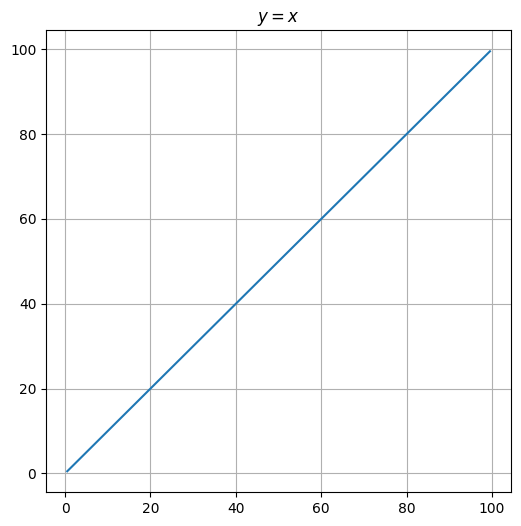

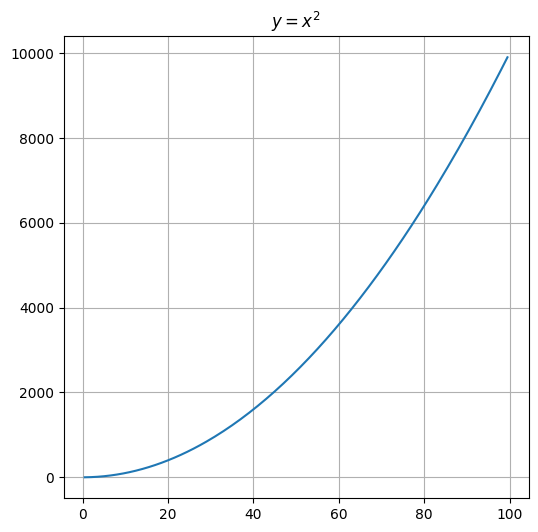

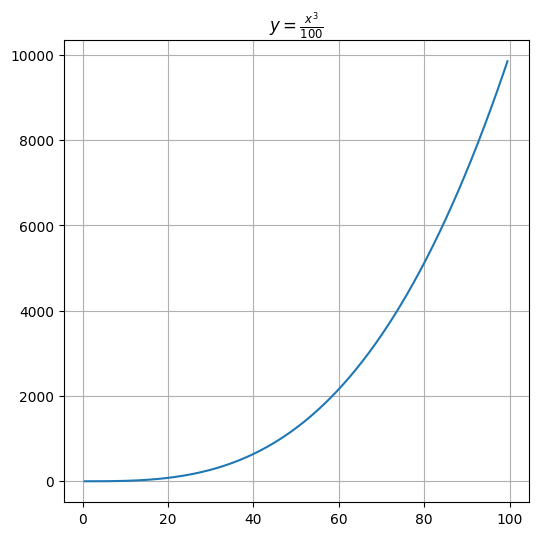

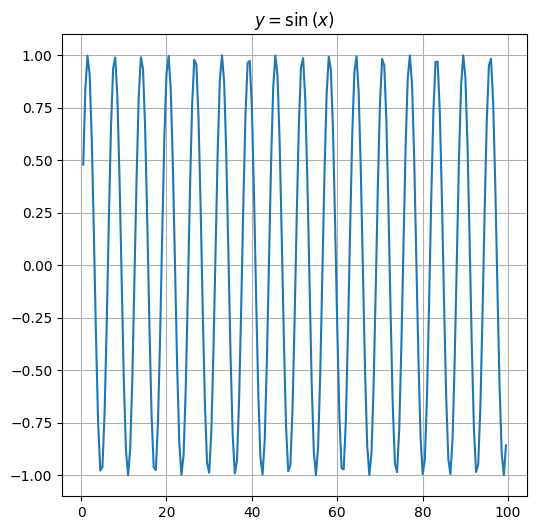

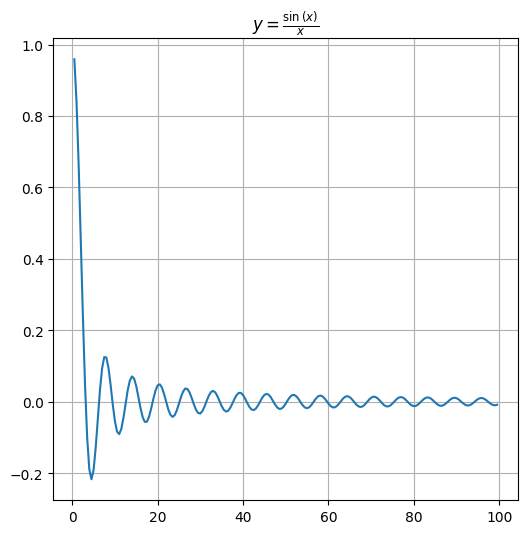

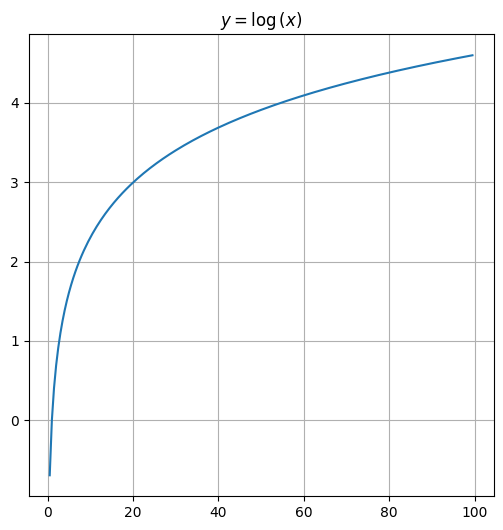

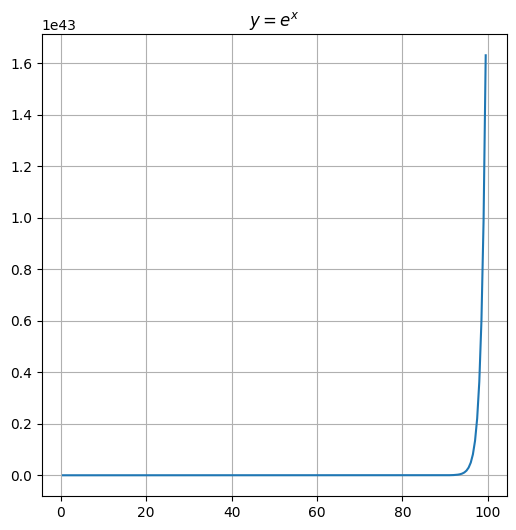

In [13]:
x = np.arange(0.5, 100, 0.5)
func1 = x
func2 = x**2
func3 = x**3/100
func4 = np.sin(x)
func5 = np.sin(x)/x
func6 = np.log(x)
func7 = np.exp(x)
title_1 = r"$y = x$"
title_2 = r"$y = x^2$"
title_3 = r"$y = \frac{x^3}{100}$"
title_4 = r"$y = \sin{(x)}$"
title_5 = r"$y = \frac{\sin{(x)}}{x}$"
title_6 = r"$y = \log{(x)}$"
title_7 = r"$y = e^x$"

functions = [func1, func2, func3, func4, func5, func6, func7]
titles = [title_1, title_2, title_3, title_4, title_5, title_6, title_7]
for i in range(7):
  plt.figure(figsize = (6, 6))
  plt.plot(x, functions[i])
  plt.title(titles[i])
  plt.grid()
  plt.show()

**Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [9]:
np.random.seed(42)
A = np.random.uniform(1, 2, size=(20, 5))

columns = ["a", "b", "c", "d", "e"]
df1 = pd.DataFrame(A, columns=columns)

max_std_column = df1.std().idxmax()

min_mean_row = df1.mean(axis=1).idxmin()

print("DataFrame:")
print(df1)
print()
print("Column with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)

DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [10]:
df1["f"] = df1[columns].sum(axis=1)

df1["g"] = np.where(df1["f"] < 8, "LT8", "GT8")

num_rows_LT8 = df1[df1["g"] == "LT8"].shape[0]

std_LT8 = df1.loc[df1["g"] == "LT8", "f"].std()
std_GT8 = df1.loc[df1["g"] == "GT8", "f"].std()

print("DataFrame with new columns:")
print(df1)
print()
print("Number of rows where value in column 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_GT8)

DataFrame with new columns:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.1409

**Q12. Write a small piece of code to explain broadcasting in numpy.**

Ans. Broadcasting in NumPy allows us to perform operations on arrays of different shapes and sizes. When performing element-wise operations between arrays, NumPy automatically broadcasts the smaller array to the larger one, making the shapes compatible.

In [35]:
matrix_1 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

matrix_2 = np.array([10, 20, 30])

matrix_3 = matrix_1 + matrix_2

print("Original Matrix:")
print(matrix_1)
print("\nArray to be added to each row:")
print(matrix_2)
print("\nResult after broadcasting:")
print(matrix_3)


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array to be added to each row:
[10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In the example, a 3x3 matrix (matrix_1) is defined, and a 1D array (matrix_2) is created. When adding these two arrays (matrix_1 + matrix_2), NumPy automatically broadcasts the 1D array to each row of the matrix, allowing the addition to be performed element-wise.

**Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [34]:
A = np.random.randint(1000, size = (2, 2, 2))
print("Array: \n", A)

def argmin(A):
  A_flat = A.flatten()
  min, idx = A_flat[0], 0
  for i, elt in enumerate(A_flat):
    if A_flat[i] <= min:
      min = A_flat[i]
      idx = i

  return idx

print()
print("Self-calculated argmin: ", argmin(A))
print("Numpy-calculated argmin: ", np.argmin(A))

Array: 
 [[[681 556]
  [573 952]]

 [[645 795]
  [ 27 619]]]

Self-calculated argmin:  6
Numpy-calculated argmin:  6
